In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
bostonDf = pd.read_csv('Boston.csv')

In [6]:
bostonDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  506 non-null    int64  
 1   crim        506 non-null    float64
 2   zn          506 non-null    float64
 3   indus       506 non-null    float64
 4   chas        506 non-null    int64  
 5   nox         506 non-null    float64
 6   rm          506 non-null    float64
 7   age         506 non-null    float64
 8   dis         506 non-null    float64
 9   rad         506 non-null    int64  
 10  tax         506 non-null    int64  
 11  ptratio     506 non-null    float64
 12  black       506 non-null    float64
 13  lstat       506 non-null    float64
 14  medv        506 non-null    float64
dtypes: float64(11), int64(4)
memory usage: 59.4 KB


In [7]:
bostonDf.describe()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,253.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,1.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,127.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,253.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,379.750000,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,506.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [8]:
bostonDf.columns

Index(['Unnamed: 0', 'crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis',
       'rad', 'tax', 'ptratio', 'black', 'lstat', 'medv'],
      dtype='object')

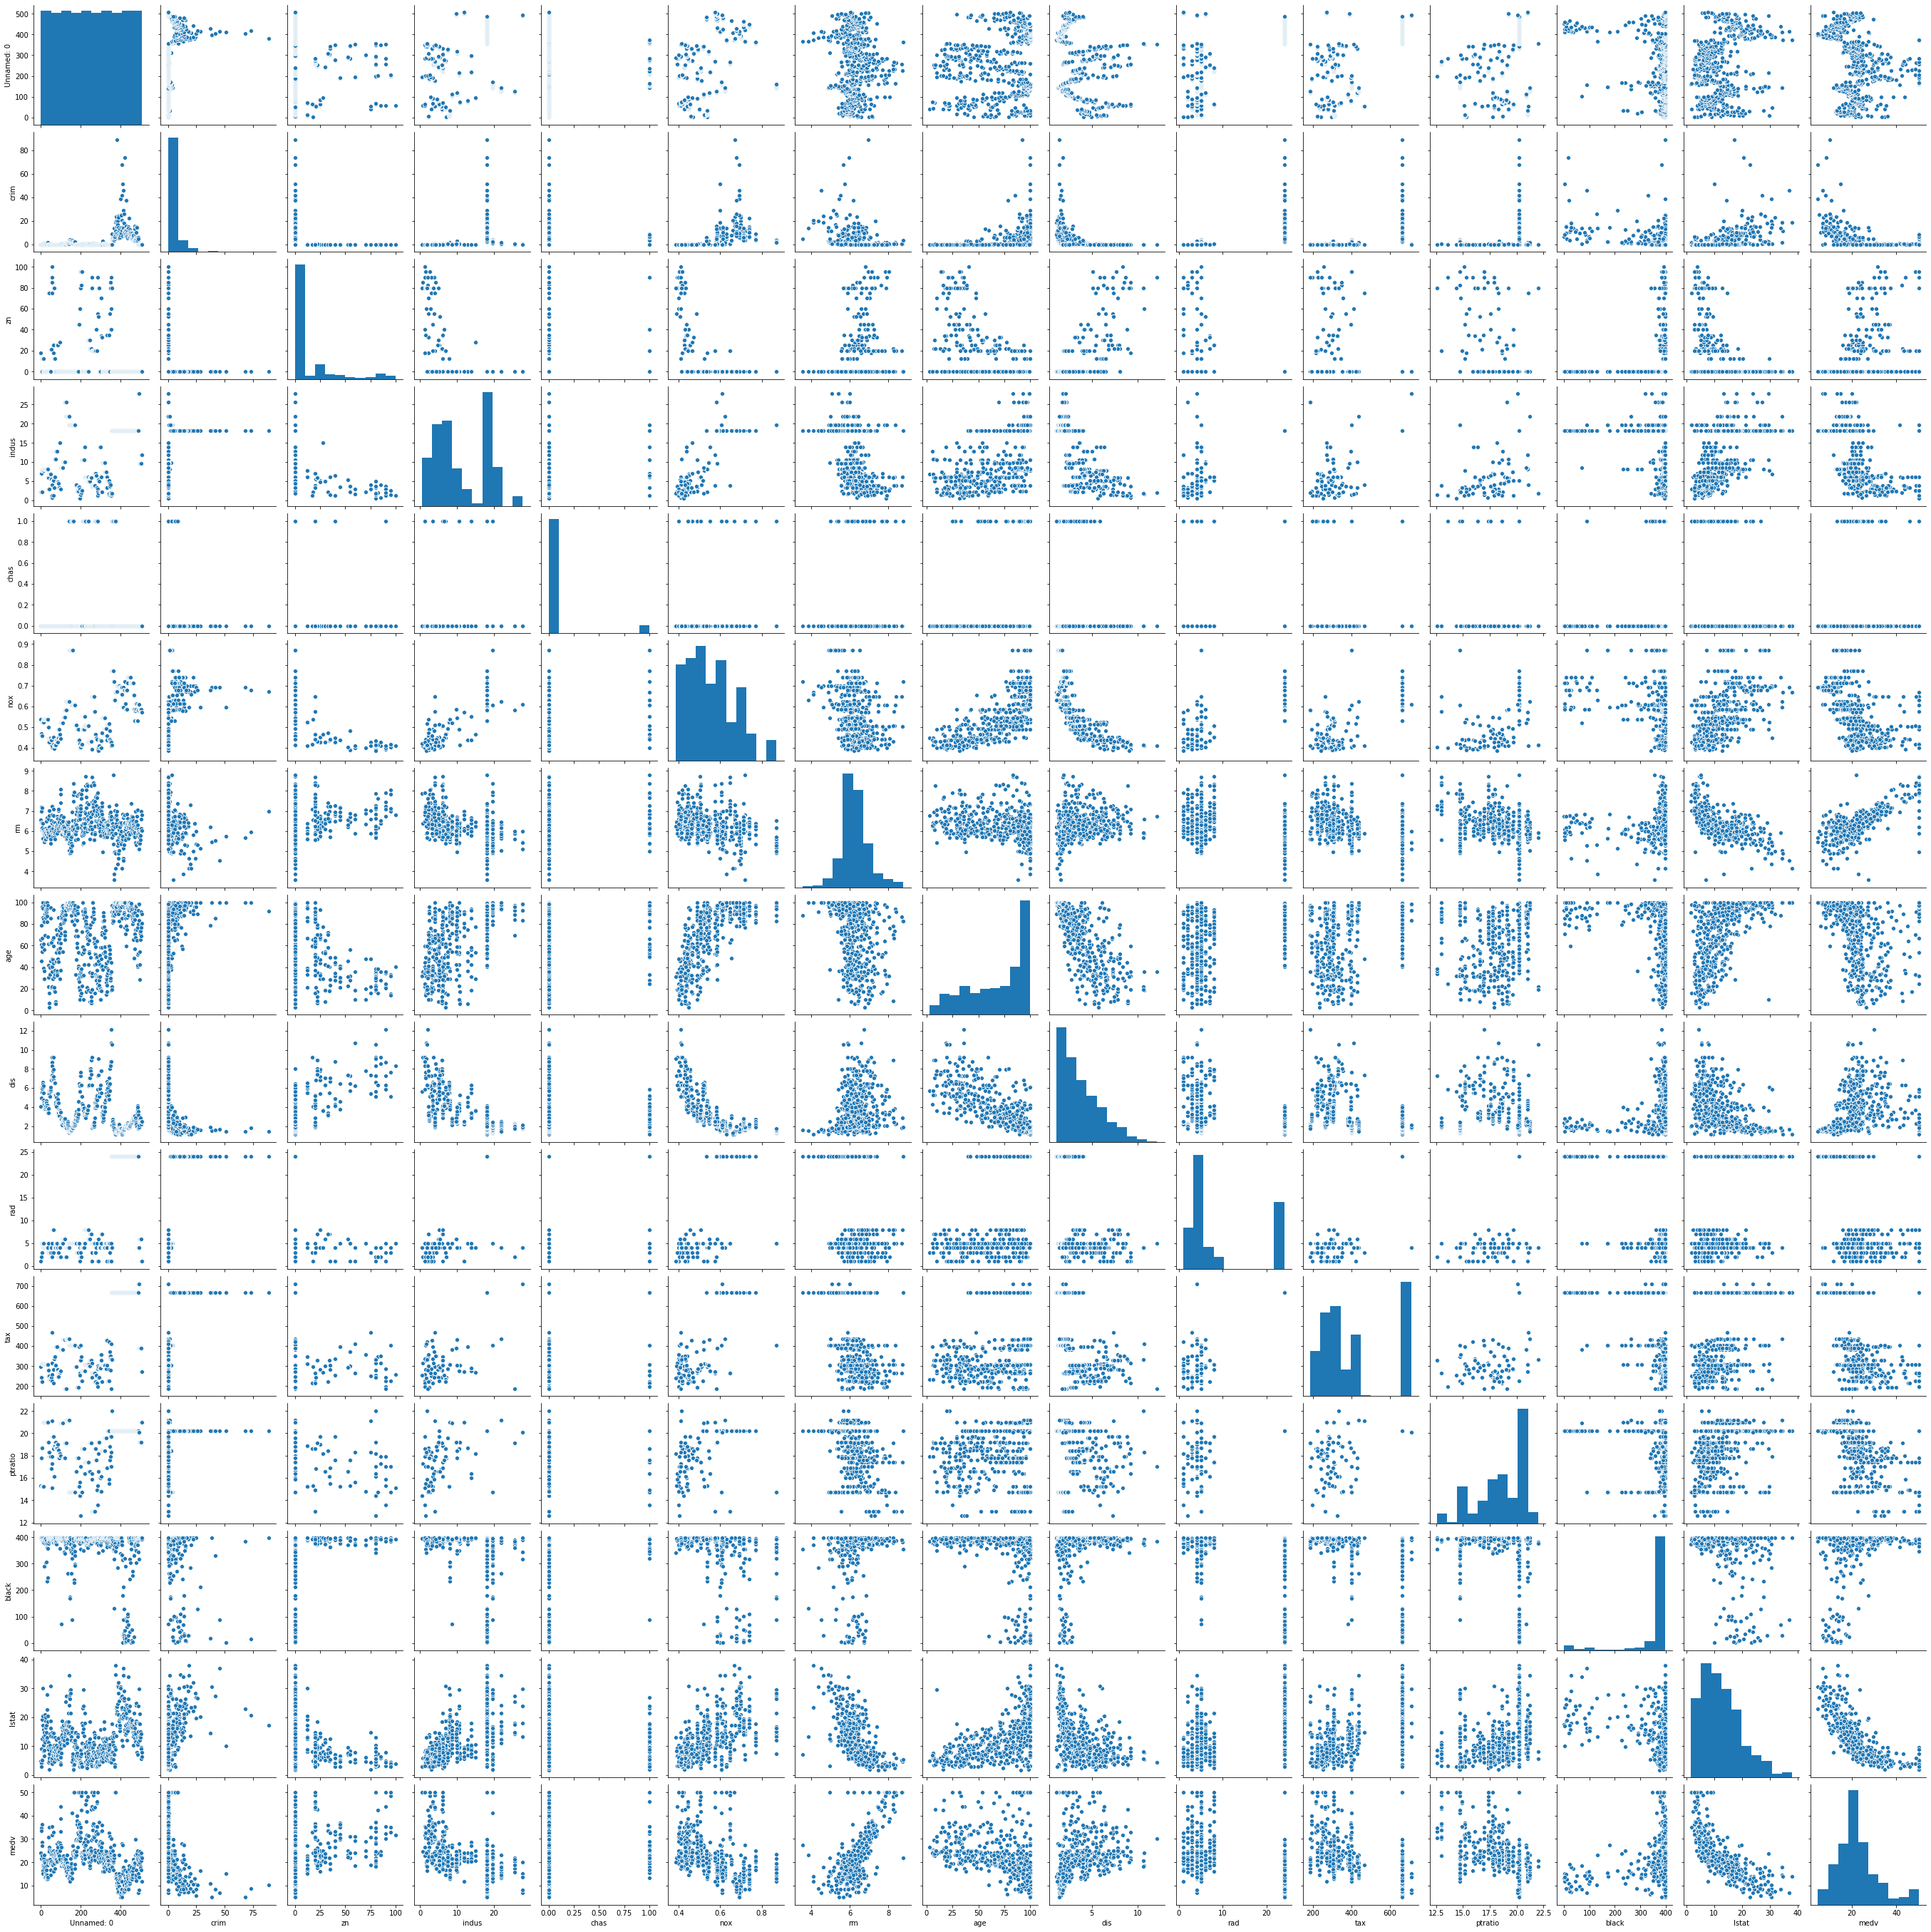

In [9]:
sns.pairplot(bostonDf)

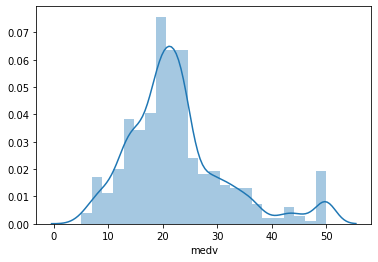

In [11]:
sns.distplot(bostonDf['medv'])

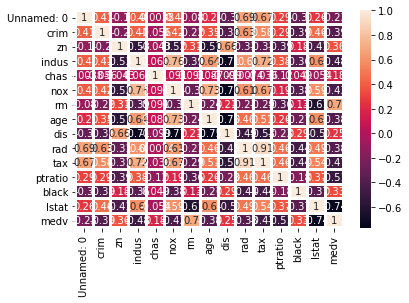

In [16]:
sns.heatmap(bostonDf.corr(),annot=True,linewidths=2)

In [17]:
x = bostonDf.drop('medv',axis=1)

In [18]:
y = bostonDf['medv']

In [19]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.3,random_state=101)

In [20]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [21]:
print(lr.intercept_)

40.21863517158239


In [22]:
print(lr.coef_)

[-4.04207880e-06 -8.85073572e-02  5.02962989e-02  2.03444102e-02
  3.75430857e+00 -1.77477633e+01  3.24782494e+00  1.19957503e-02
 -1.40919854e+00  2.63905125e-01 -1.03425841e-02 -9.51765632e-01
  6.11609790e-03 -5.97133150e-01]


In [23]:
coeffDf = pd.DataFrame(lr.coef_,x.columns,columns=['Coeff'])

In [24]:
coeffDf

,Coeff
Unnamed: 0,-0.000004
crim,-0.088507
zn,0.050296
indus,0.020344
chas,3.754309
nox,-17.747763
rm,3.247825
age,0.011996
dis,-1.409199
rad,0.263905


In [25]:
pred = lr.predict(x_test)

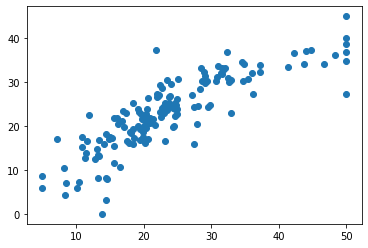

In [26]:
plt.scatter(y_test,pred)

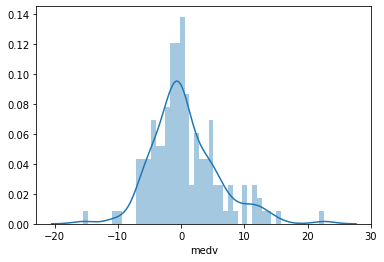

In [27]:
sns.distplot((y_test-pred),bins=50)